## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

## Preprocessing Data

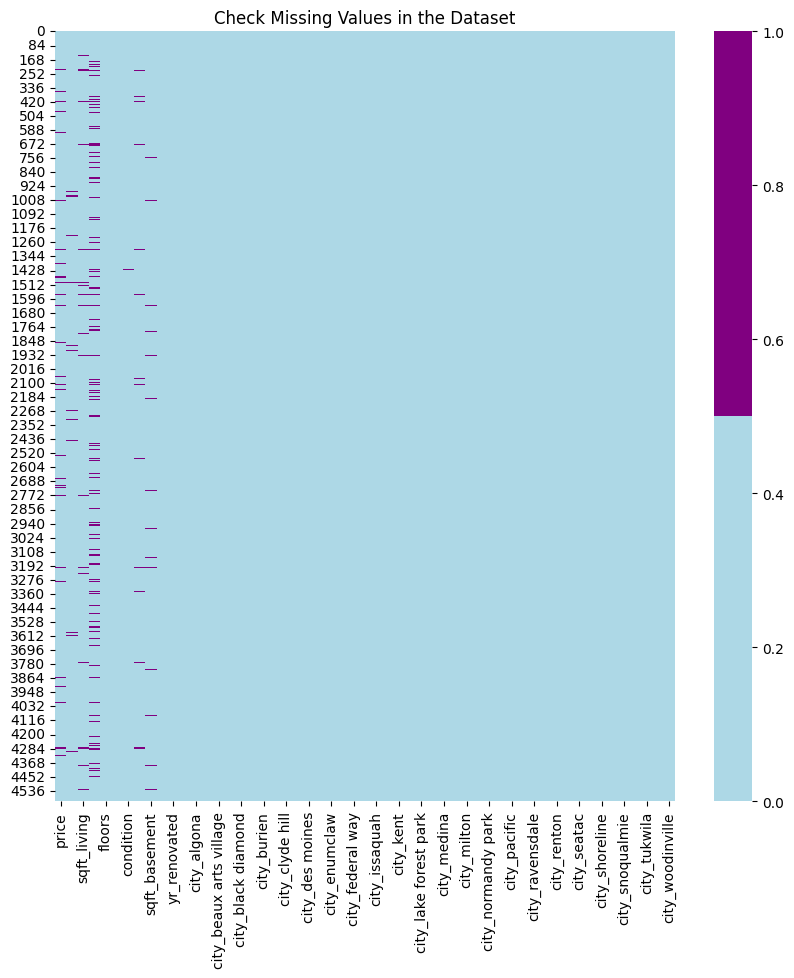

Mean: price            551962.988473
floors                1.512065
bedrooms              3.400870
sqft_living        2139.346957
sqft_lot          14852.516087
condition             3.451739
sqft_above         1827.265435
sqft_basement       312.081522
yr_built           1970.786304
yr_renovated        808.608261
dtype: float64
Std: price            563834.702547
floors                0.538288
bedrooms              0.908848
sqft_living         963.206916
sqft_lot          35884.436145
condition             0.677230
sqft_above          862.168977
sqft_basement       464.137228
yr_built             29.731848
yr_renovated        979.414536
dtype: float64


In [2]:
data = pd.read_csv('data.csv')

#removing null values
data = data.dropna()


#segragating numeric and string data type columns 
numeric_columns= [ 'price', 'floors','bedrooms', 'sqft_living', 'sqft_lot' ,'condition', 'sqft_above', 
                  'sqft_basement', 'yr_built','yr_renovated']
categorical_columns= ['street', 'city']

#normalizing numeric data 
mean = data[numeric_columns].mean()
std = data[numeric_columns].std()
data[numeric_columns] = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

#removing outliers
for column in numeric_columns:
    q1, q3 = np.percentile(data[column], [25, 75])
    iqr= q3-q1
    lower_bound= q1 -1.5*iqr
    upper_bound= q3+ 1.5*iqr
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), np.nan, data[column])

#standarizing string data type columns 
for col in categorical_columns:
    data[col] = data[col].astype(str).str.lower().str.strip()
    data[col] = data[col].replace(to_replace=r'[^a-zA-Z0-9\s]', value='', regex=True)

#one hot encoding
data = pd.get_dummies(data, columns = ['city'])

cols = data.columns[:55] 
colours = ['#ADD8E6', '#800080'] 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours),ax=ax)
plt.title("Check Missing Values in the Dataset")
plt.show()
print('Mean:', mean)
print('Std:', std)

### Null values, Duplicates , Redundant Data

In [3]:
#filling null values with mean 
data = data.fillna(data.mean())

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    # print('{} - {}%'.format(col, round(pct_missing*100)))

#dropping duplicates 
data.drop_duplicates()

#reseting the index 
data.reset_index(drop=True)

#dropping unnecessary columns 
data= data.drop('view', axis=1)
data= data.drop('street', axis=1)

#saving the  cleansed dataset
data.to_csv('data_cleaned.csv', index= False)

data.head()

/tmp/ipykernel_12267/3486935386.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


price  bedrooms  sqft_living  sqft_lot    floors  condition  sqft_above  \
0 -0.423817 -0.441074    -0.829881 -0.193413 -0.022414  -0.667040   -0.565162   
1 -0.124122  1.759513     1.568358 -0.161700  0.906456   2.286168    1.789365   
2 -0.372384 -0.441074    -0.217344 -0.080969 -0.951284   0.809564    0.119158   
3 -0.234046 -0.441074    -0.144670 -0.190125 -0.951284   0.809564   -0.959517   
4 -0.003481  0.659220    -0.206962 -0.121293 -0.951284   0.809564   -0.797135   

   sqft_basement  yr_built  yr_renovated  ...  city_seatac  city_seattle  \
0      -0.672391 -0.530956      1.221538  ...            0             0   
1      -0.069121 -1.674511     -0.825604  ...            0             1   
2      -0.672391 -0.160982     -0.825604  ...            0             0   
3       1.482145 -0.261884     -0.825604  ...            0             0   
4       1.051238  0.175357      1.208264  ...            0             0   

   city_shoreline  city_skykomish  city_snoqualmie  city_snoqualmie pass  \
0               1               0                0                     0   
1               0               0                0                     0   
2               0               0                0                     0   
3               0               0                0                     0   
4               0               0                0                     0   

   city_tukwila  city_vashon  city_woodinville  city_yarrow point  
0             0            0                 0                  0  
1             0            0                 0                  0  
2             0            0                 0                  0  
3             0            0                 0                  0  
4             0            0                 0                  0  

[5 rows x 54 columns]

## Gathering Data Information

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    4600 non-null   float64
 1   bedrooms                 4600 non-null   float64
 2   sqft_living              4600 non-null   float64
 3   sqft_lot                 4600 non-null   float64
 4   floors                   4600 non-null   float64
 5   condition                4600 non-null   float64
 6   sqft_above               4600 non-null   float64
 7   sqft_basement            4600 non-null   float64
 8   yr_built                 4600 non-null   float64
 9   yr_renovated             4600 non-null   float64
 10  city_algona              4600 non-null   uint8  
 11  city_auburn              4600 non-null   uint8  
 12  city_beaux arts village  4600 non-null   uint8  
 13  city_bellevue            4600 non-null   uint8  
 14  city_black diamond      

## Visualizing data Information

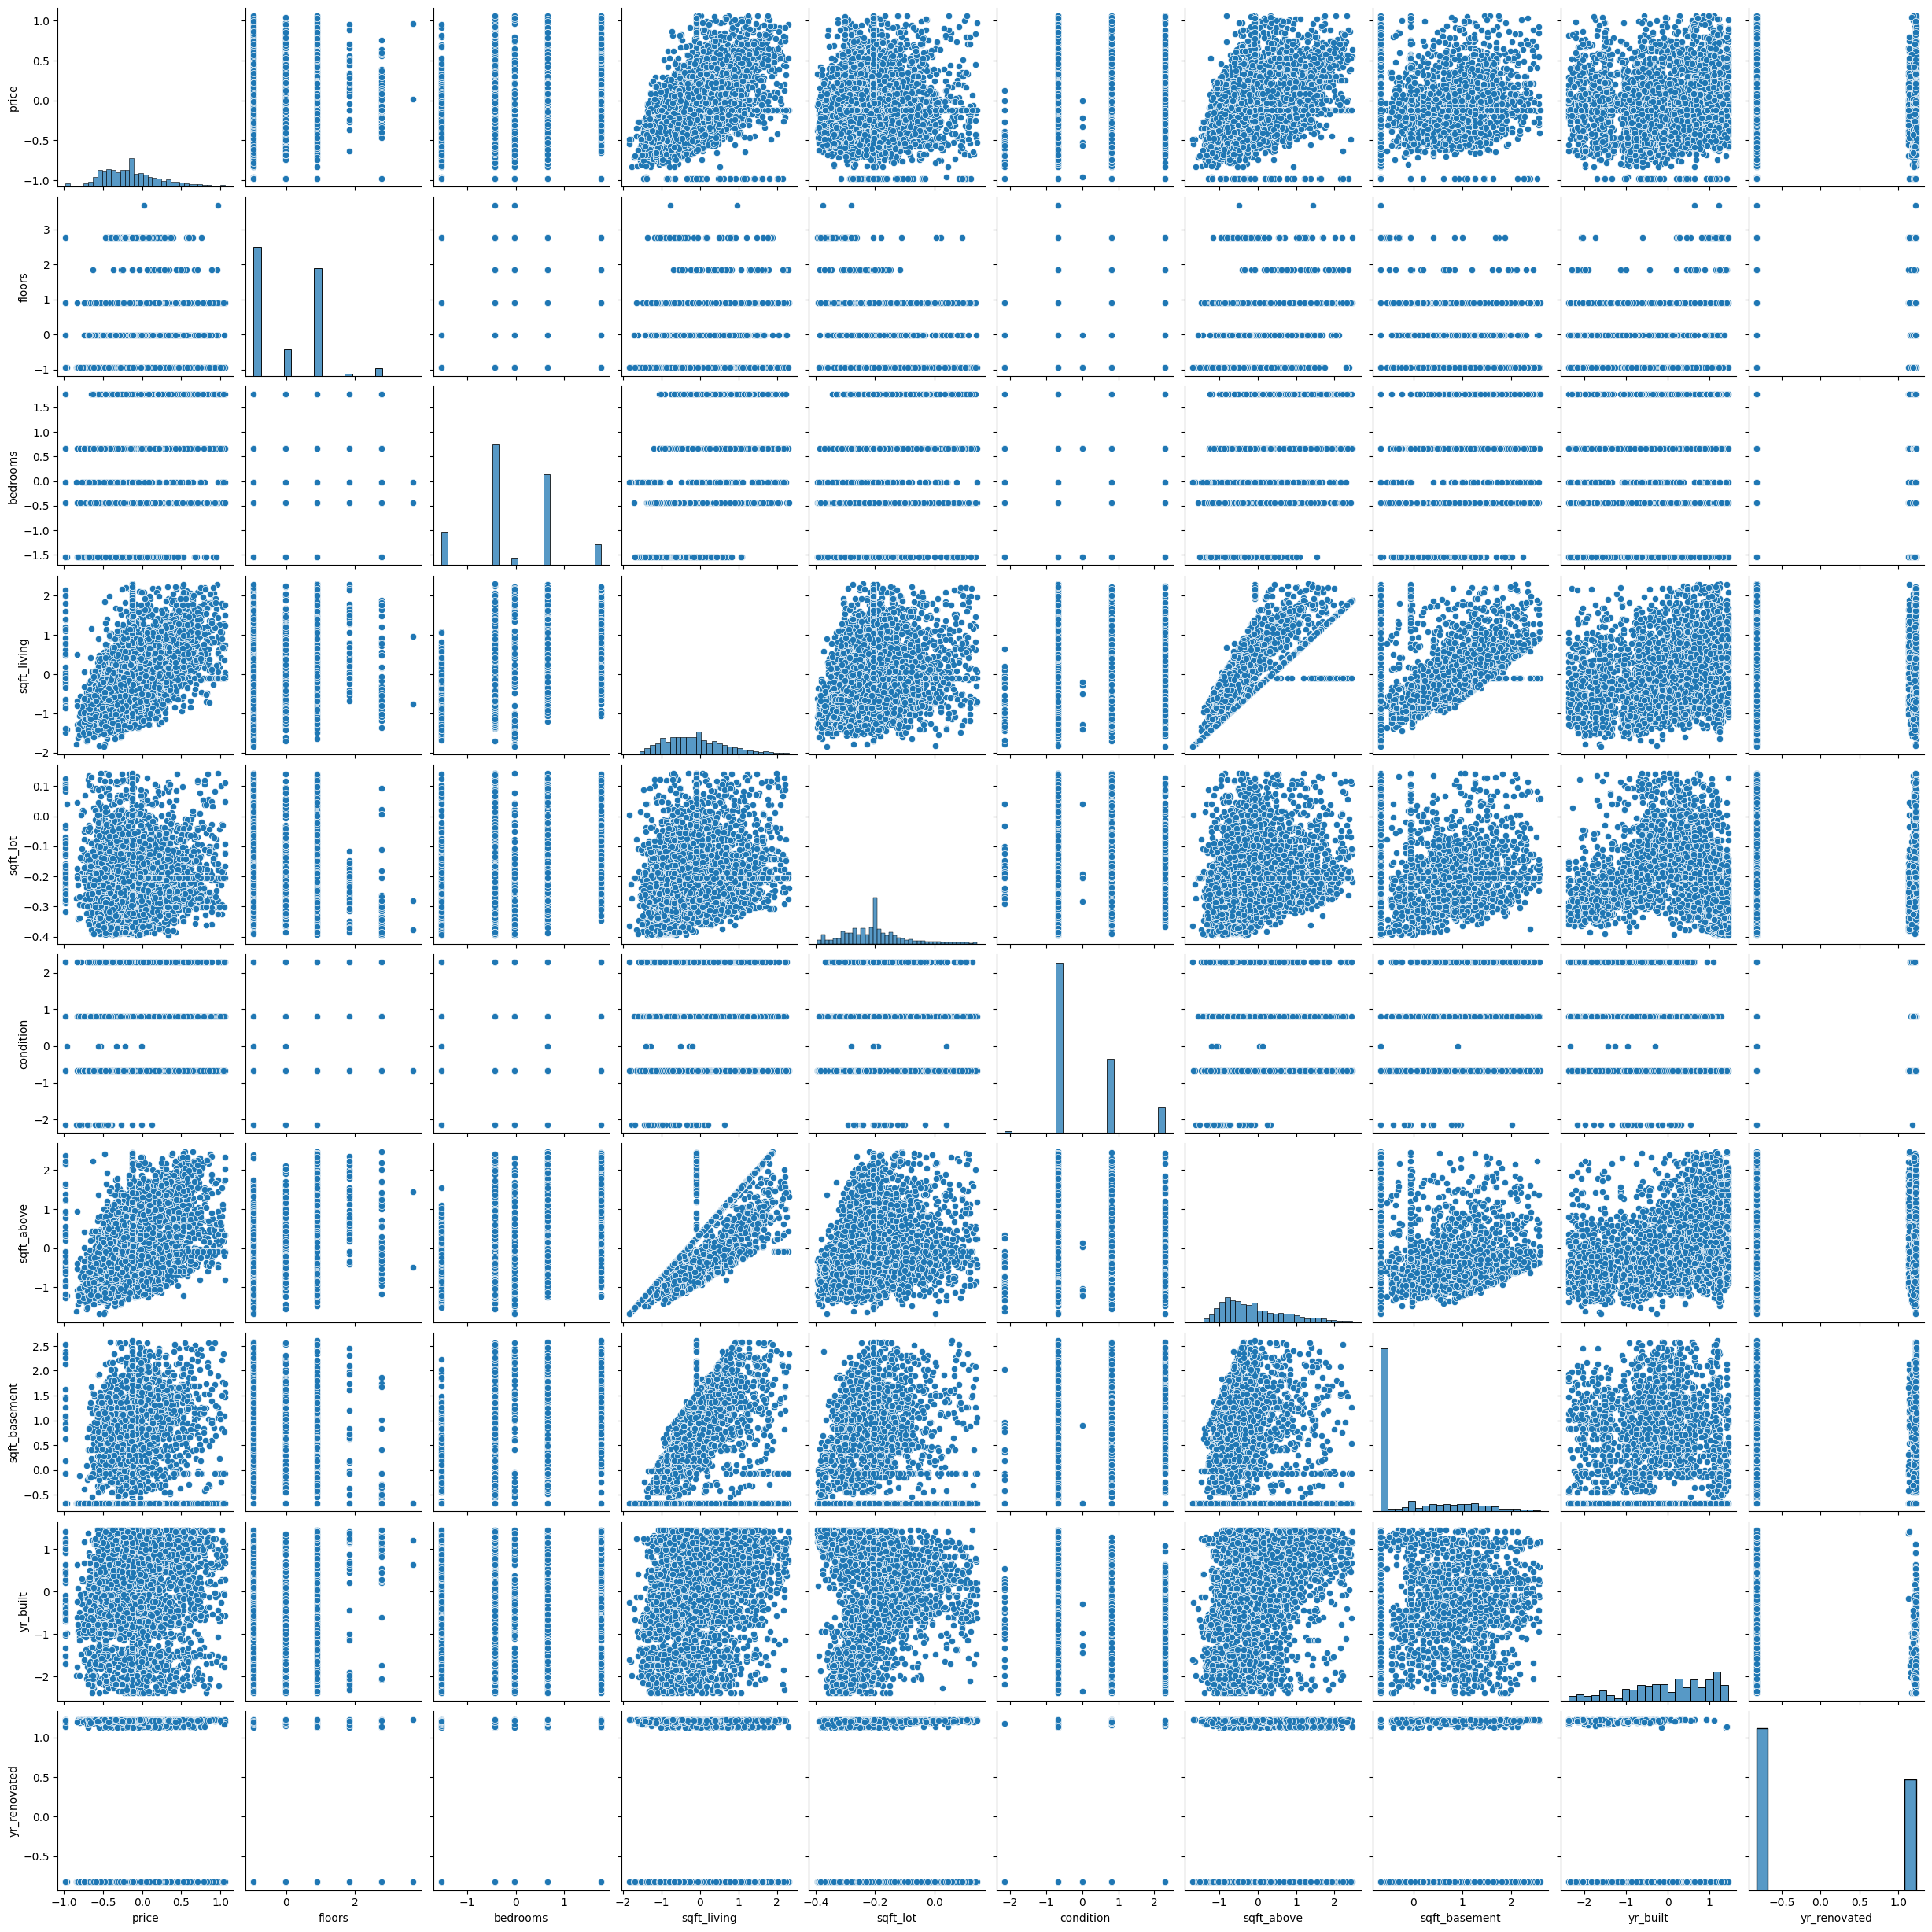

In [18]:
sns.pairplot(data[numeric_columns])
plt.show()

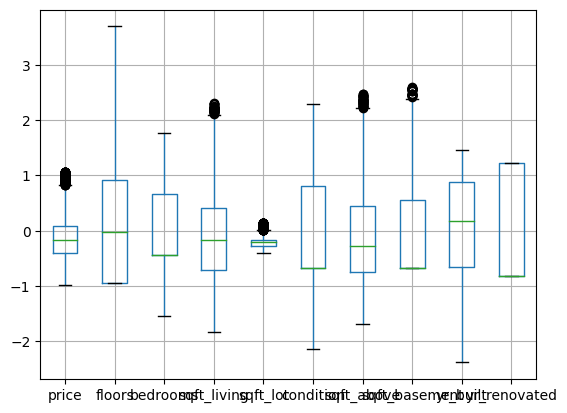

In [19]:
data.boxplot(numeric_columns)
plt.show()

## Data Analysis 

### Correlation Analysis 

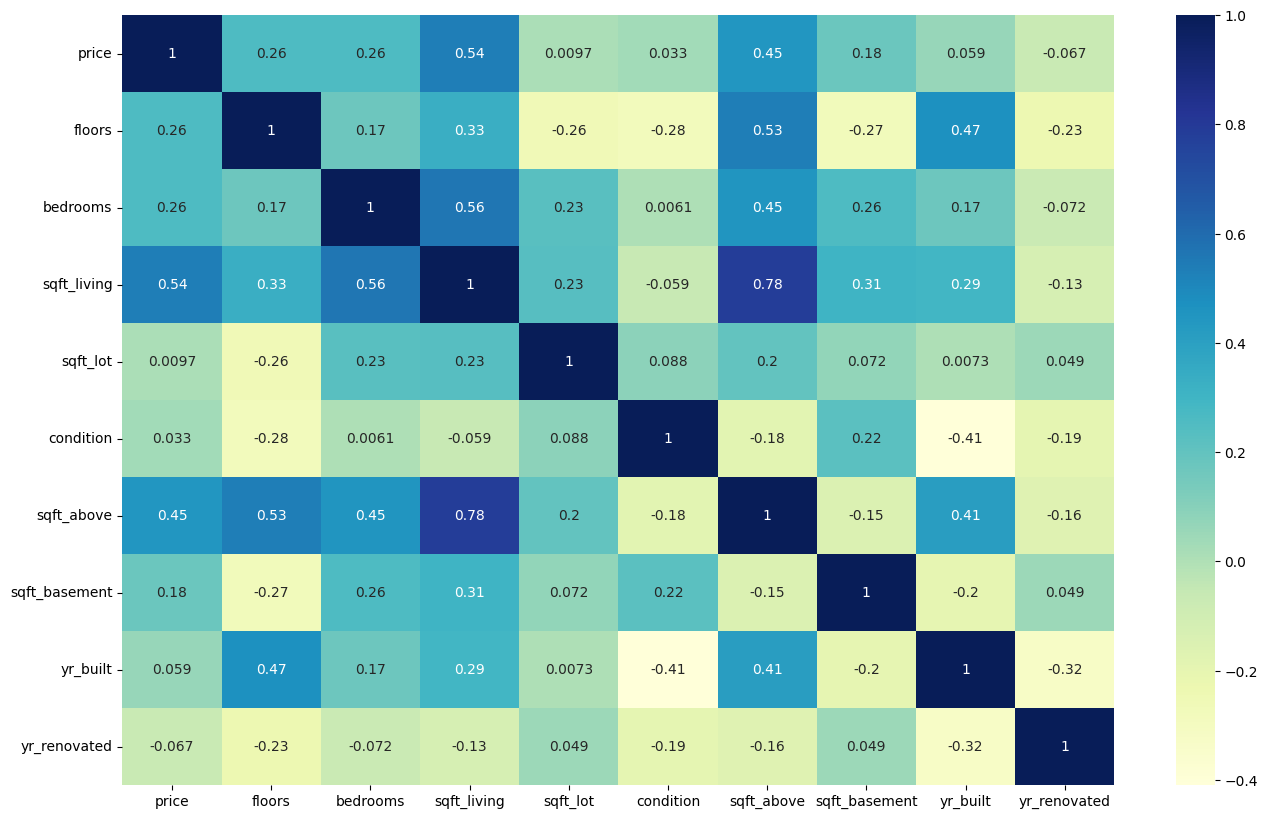

In [4]:
# analyzing correlation 
scaler = MinMaxScaler()

numeric_columns= [ 'price', 'floors','bedrooms', 'sqft_living', 'sqft_lot' ,'condition', 'sqft_above', 
                  'sqft_basement', 'yr_built','yr_renovated']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
plt.figure(figsize = (16, 10))
sns.heatmap(data[numeric_columns].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [5]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=True)

city_kent                 -0.175091
city_auburn               -0.169702
city_federal way          -0.163157
city_renton               -0.127504
city_covington            -0.102134
city_maple valley         -0.098959
city_des moines           -0.093170
city_seatac               -0.087824
city_tukwila              -0.085279
city_burien               -0.079242
yr_renovated              -0.066721
city_shoreline            -0.064981
city_enumclaw             -0.063566
city_pacific              -0.043224
city_algona               -0.042212
city_north bend           -0.040246
city_duvall               -0.034873
city_skykomish            -0.029630
city_black diamond        -0.029366
city_kenmore              -0.019382
city_milton               -0.019138
city_lake forest park     -0.013862
city_carnation            -0.008940
city_normandy park        -0.006178
city_medina               -0.006095
city_inglewoodfinn hill   -0.003914
city_vashon               -0.003496
city_bothell              -0

## Spilliting the data 

In [7]:
label = data['price']
features = data.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'city_algona', 'city_auburn', 'city_beaux arts village',
       'city_bellevue', 'city_black diamond', 'city_bothell', 'city_burien',
       'city_carnation', 'city_clyde hill', 'city_covington',
       'city_des moines', 'city_duvall', 'city_enumclaw', 'city_fall city',
       'city_federal way', 'city_inglewoodfinn hill', 'city_issaquah',
       'city_kenmore', 'city_kent', 'city_kirkland', 'city_lake forest park',
       'city_maple valley', 'city_medina', 'city_mercer island', 'city_milton',
       'city_newcastle', 'city_normandy park', 'city_north bend',
       'city_pacific', 'city_preston', 'city_ravensdale', 'city_redmond',
       'city_renton', 'city_sammamish', 'city_seatac', 'city_seattle',
       'city_shoreline', 'city_skykomish', 'city_snoqualmie',
       'city_snoqualmie pass', 'city_tukwila', 'city_vashon',
       'city_woodinvil

## L1 Regularization

In [8]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Instantiate Lasso regression model
# lasso = Lasso(alpha=0.04, fit_intercept=True)
# lasso.fit(X_train, y_train)
# lasso.coef_


# # Predict target variable on test data
# y_pred = lasso.predict(X_test_scaled)

# # Evaluate performance of the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print(f'Mean Absolute Error: {mae:.2f}')
# print(f'Root Mean Squared Error: {rmse:.2f}')
# print('Mean Squared Error:', mse)

# accuracy = lasso.score(X_test, y_test)
# "Accuracy: {}%".format(int(round(accuracy * 100)))


### L2 Regularization

In [12]:
ridge = Ridge(alpha=50)
print(X_train.columns)
# Train the model
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print('Mean Squared Error:', mse)

accuracy = ridge.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'city_algona', 'city_auburn', 'city_beaux arts village',
       'city_bellevue', 'city_black diamond', 'city_bothell', 'city_burien',
       'city_carnation', 'city_clyde hill', 'city_covington',
       'city_des moines', 'city_duvall', 'city_enumclaw', 'city_fall city',
       'city_federal way', 'city_inglewoodfinn hill', 'city_issaquah',
       'city_kenmore', 'city_kent', 'city_kirkland', 'city_lake forest park',
       'city_maple valley', 'city_medina', 'city_mercer island', 'city_milton',
       'city_newcastle', 'city_normandy park', 'city_north bend',
       'city_pacific', 'city_preston', 'city_ravensdale', 'city_redmond',
       'city_renton', 'city_sammamish', 'city_seatac', 'city_seattle',
       'city_shoreline', 'city_skykomish', 'city_snoqualmie',
       'city_snoqualmie pass', 'city_tukwila', 'city_vashon',
       'city_woodinvil

'Accuracy: 45%'

In [10]:
import joblib

# Save the trained model
joblib.dump(ridge, 'model.pkl')

['model.pkl']